In [53]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import pandas as pd

In [54]:
data = pd.read_csv('data.csv')
data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [56]:
df = data.dropna(subset=['email'])

## After removing 1 row

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2999 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   2999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.3+ KB


## Now appling TF-IDF vectorizer

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df['email'])
print(x.shape)

(2999, 34116)


## Fitting Data in X and y

In [59]:
X_dense = x.toarray()

In [60]:
y = df['label'].to_numpy()

In [61]:
single_neuron = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(x.shape[1],))
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
single_neuron.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


## now apply Train test split

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_dense,
    y,
    test_size=0.2,
    random_state=42
)

## Now train single neuron

In [64]:
history = single_neuron.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7972 - loss: 0.6701 - val_accuracy: 0.8062 - val_loss: 0.6088
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8433 - loss: 0.5827 - val_accuracy: 0.8062 - val_loss: 0.5454
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8284 - loss: 0.5225 - val_accuracy: 0.8062 - val_loss: 0.4984
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8319 - loss: 0.4725 - val_accuracy: 0.8062 - val_loss: 0.4615
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8461 - loss: 0.4265 - val_accuracy: 0.8062 - val_loss: 0.4321
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8502 - loss: 0.3980 - val_accuracy: 0.8125 - val_loss: 0.4075
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8330 - loss: 0.3831 - val_accuracy: 0.8167 - val_loss: 0.3860
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8624 - loss: 0.3480 - val_accuracy: 0.8208 - val_loss

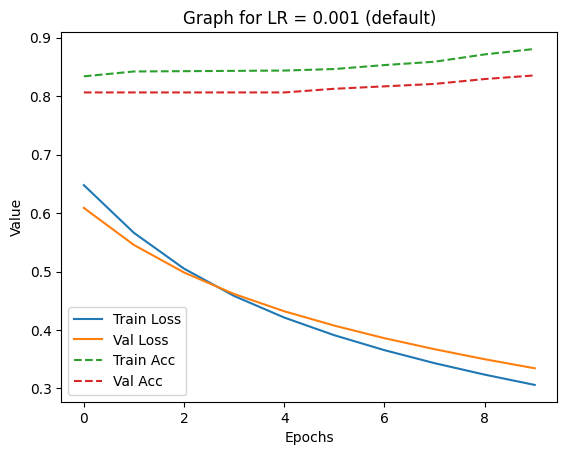

In [65]:
import matplotlib.pyplot as plt

plt.figure()

# Train Loss (solid)
plt.plot(history.history['loss'], linestyle='-')

# Validation Loss (solid)
plt.plot(history.history['val_loss'], linestyle='-')

# Train Accuracy (dashed)
plt.plot(history.history['accuracy'], linestyle='--')

# Validation Accuracy (dashed)
plt.plot(history.history['val_accuracy'], linestyle='--')

plt.legend(['Train Loss', 'Val Loss', 'Train Acc', 'Val Acc'])
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.title("Graph for LR = 0.001 (default)")
plt.show()

## Graph on diffrent Learning Rate(LR)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


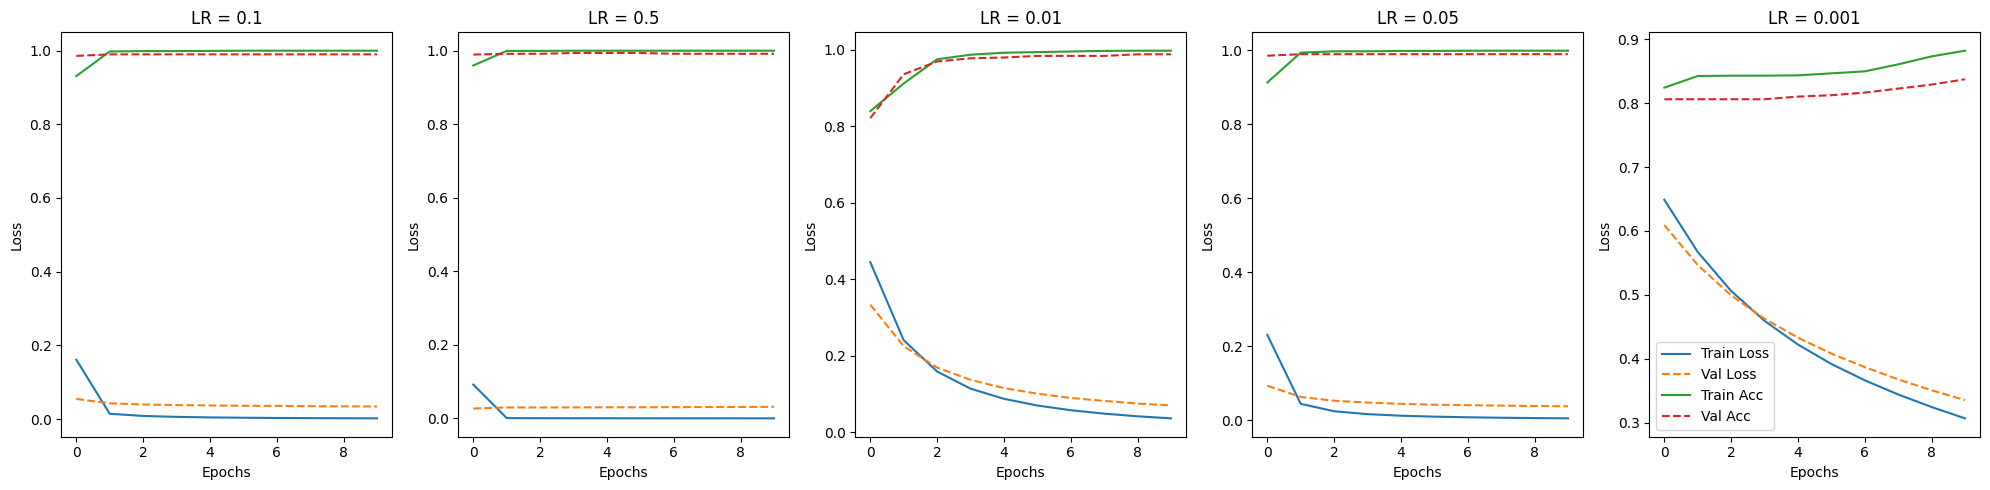

In [71]:
import tensorflow as tf
import matplotlib.pyplot as plt

learning_rates = [0.1, 0.5, 0.01, 0.05, 0.001]

fig, axs = plt.subplots(1, 5, figsize=(20, 5))

for i, lr in enumerate(learning_rates):

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        X_train,
        y_train,
        epochs=10,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )

    axs[i].plot(history.history['loss'])
    axs[i].plot(history.history['val_loss'], linestyle='--')
    axs[i].plot(history.history['accuracy'])
    axs[i].plot(history.history['val_accuracy'], linestyle='--')

    axs[i].set_title(f"LR = {lr}")
    axs[i].set_xlabel("Epochs")
    axs[i].set_ylabel("Loss")

plt.tight_layout()
plt.legend(['Train Loss', 'Val Loss', 'Train Acc', 'Val Acc'])
plt.show()

